In [96]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDClassifier
import numpy as np
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Linear models for classification

**Binary classification formula**:

$$ y = w_0x_0 + w_1x_1 + ... + w_nx_n + b > 0 $$

 * similar to linear regression, but instead of returning the weighted sum of the features, we threshold the predicted value at zero.
 * If y is smaller than zero, we predict the class –1, if y larger than zero, we predict the class +1.
 * This prediction rule is common to all linear models for classification.
 * there are many different ways to find the coefficients (w) and the intercept (b).
 * For linear models for classification, the **decision boundary** is a line, a plane, or a hyperplane depending if it is a binary or higher dimensional classification.
 * For technical mathematical reasons, it is not possible to adjust w and b to minimize the number of misclassifications the algorithms produce
 
Two most common linear classifiers are **LogisitcRegression** and **Linear Support Vector Machines (SVM)**

Apply the LogisticRegression and LinearSVC models to the forge dataset, and visualize the decision boundary as found by the linear models.

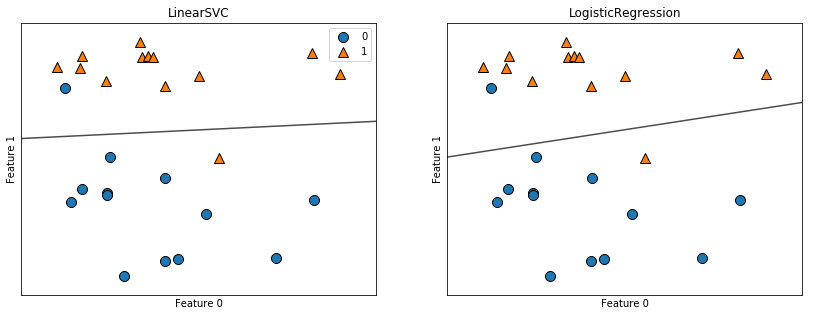

In [15]:
# setup data
X, y = mglearn.datasets.make_forge()

# construct subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression(solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

 * The two models come up with similar decision boundaries. 
 * Both misclassify two of the points. 
 * By default, both models apply an L2 regularization, as Ridge does for regression.
 * The trade-off parameter that determines the strength of the regularization is called C
 * higher values of C correspond to less regularization.
 * When using a high value for C, LR and LSVC try to fit the training set as best as possible, while with low C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.
 
Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified correctly.

<img src="img/lr_svc.png" alt="Drawing" style="width: 700px;"/>



# Logistic regression

 * Logistic regression is used in **<font color='red'>CLASSIFICATION!!</font>** problems, not in regressions problems. 
 * Logistic regression outputs probabilities 'p'.

        If p > 0.5: the data is labelled '1'

        If p < 0.5: the data is labelled '0'
        
 * Like the 𝛼 parameter of Lasso and Ridge regularization, logistic regression also has a regularization parameter: C.
 * C controls the inverse of the regularization strength.
 * A large C can lead to an overfit model, while a small C can lead to an underfit model.

Let’s analyze LogisticRegression in more detail on the Breast Cancer dataset:

In [19]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


The default C=1 provides quite good performance, but as training and test set performance are very
close, it is likely we are underfitting. Let’s try to increase C to fit a more flexible model:

In [21]:
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [24]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Let’s look at the coefficients learned by the models with the three different set‐
tings of the regularization parameter C

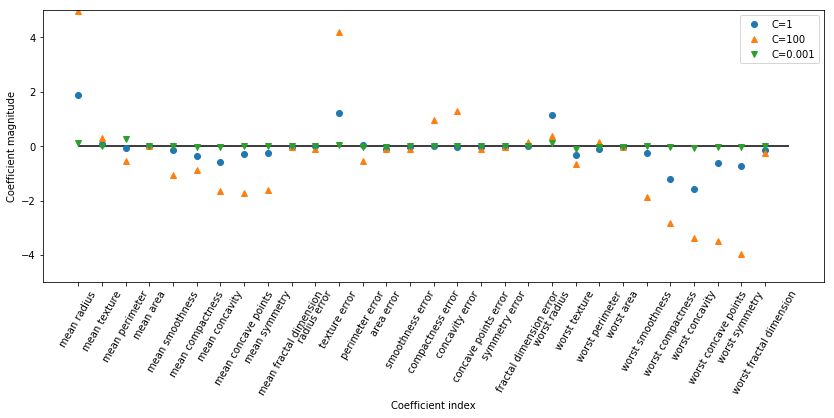

In [33]:
plt.figure(figsize=(14, 5))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=60)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92

Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96

Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98



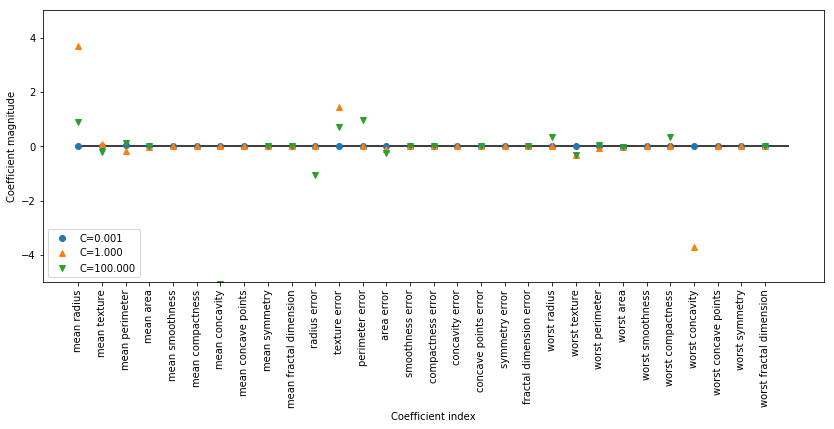

In [41]:
plt.figure(figsize=(14, 5)) 

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}\n".format(
        C, lr_l1.score(X_test, y_test)))   
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

As in regression, the main difference between the models is the penalty parameter, which influences the regularization and whether the model will use all available features or select only a subset.

## Multiclass classification

 * Many linear classification models are for binary classification only with the exception of LogisticRegression
 * Usually binary classification is extended with **one-vs-all** approach
 * Algorithm compares each class separately to all others and predicts the class that has highest score
 * Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class.
 * The class for which the result of the classification confidence formula given here is highest is the assigned class label:

$$ y = w_0x_0 + w_1x_1 + ... + w_nx_n + b $$

 * the mathematics behind multiclass classification for logistic regression is different from one-vs-all tactic but also results in one coefficient vector and intercept per class and same method for prediction is used

Let’s apply the one-vs.-rest method to a simple three-class classification dataset.

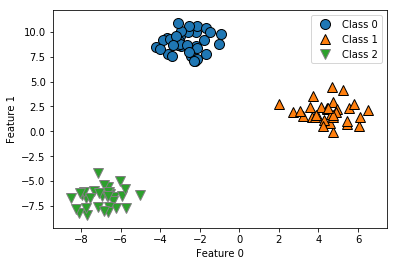

In [111]:
# Two-dimensional toy dataset containing three classes
X, y = datasets.make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

# Linear Support Vector Machines
## LinearSVM

In [112]:
X, y = mglearn.datasets.make_forge()

linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


<font size="3">The shape of the coef_ is (3, 2), meaning each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers </font>

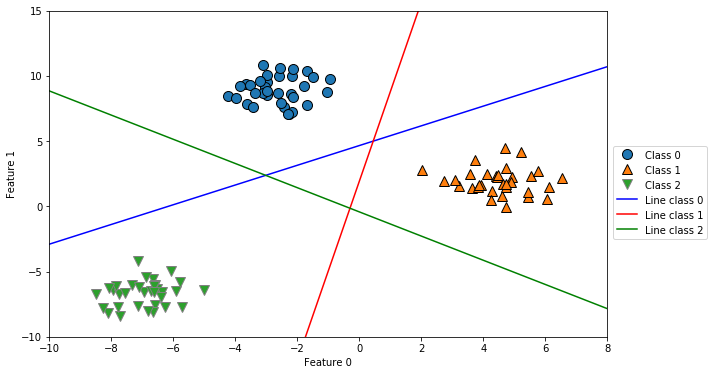

In [123]:
plt.figure(figsize=(10,6))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15, num=50) 

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
    'Line class 2'], loc=(1.01, 0.3))
plt.show()

 * all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier.
 * The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2
 * The triangle in the middle of the plot will correspond the class with the highest value for the classification formula: the class of the closest line.
 
Full regions for each class:

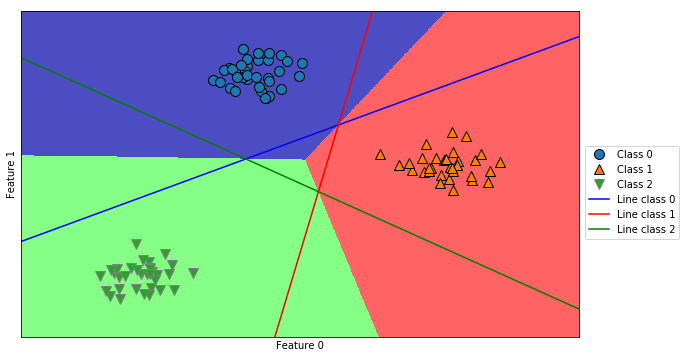

In [128]:
plt.figure(figsize=(10,6))

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
    ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Large Margin Classification

In [3]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# lets extract petal length and width only
X = iris.data[:, 2:]
y = iris.target

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# lets distinguish between setosa and veriscolor only
set_or_vers = (y == 0) | (y == 1)
X = X[set_or_vers]
y = y[set_or_vers]

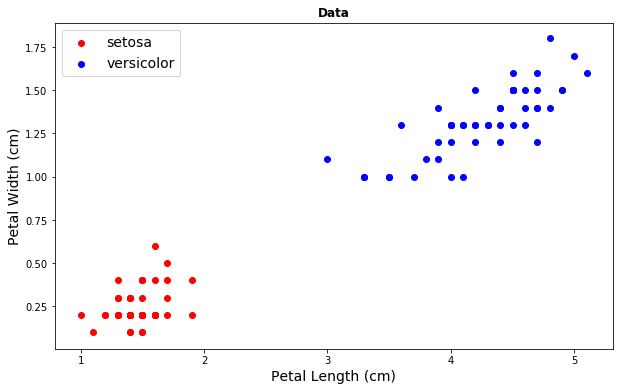

In [15]:
# plot the data
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', label='setosa')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', label='versicolor')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.title('Data', weight='bold')
plt.legend(fontsize=14)
plt.show()

In [16]:
# SVM classifier model
svc_clf = SVC(kernel='linear', C=float("inf"))
svc_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

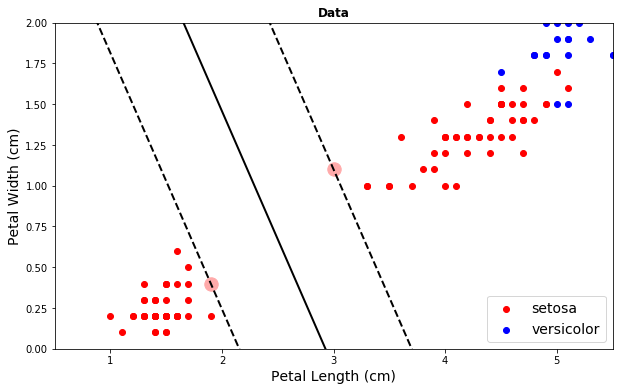

In [34]:
# plot the data with decision boundries
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', label='setosa')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', label='versicolor')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.title('Data', weight='bold')
plt.legend(fontsize=14)

w = svc_clf.coef_[0] # w_0 and w_1 coefficients list
b = svc_clf.intercept_[0] # bias term list

# At the decision boundary, w0*x0 + w1*x1 + b = 0  =>  x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0.5, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

# margin = 1/w[1]
# gutter_up = decision_boundary + margin
# gutter_down = decision_boundary - margin

svs = svc_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.axis([0.5, 5.5, 0, 2])
plt.show()

The border (support) points can be found with:

In [18]:
svc_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

* the solid black line locates at $w_0x_0 + w_1x_1 + b = 0$
* the solid black line stays away from separate classes as far as possible
* **large margin cassificiation** - it tries to fit the widest possible street betwwen the classes
* the circled points are **support vectors** that represent the first class members measured from the decision boundry

## Soft Margin Classification

* **Soft Margin Classification** - good balance between keeping the street as large as possible and limiting the *margin violations*
* can control this balance using the $C$ hyperparameter
* a smaller $C$ value leads to a wider street but more margin violations
* If SVM model is **overfitting**, you can try regularizing it by reducing $C$ .

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# Soft Margin Classifier for detecting Vriginica flowers
X = iris.data[:, 2:] # select only petal length and width
y = (iris.target == 2).astype(np.float64) # virginica true, other false

svm_clf = Pipeline([
    ('sclaer', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')) # hinge loss function
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('sclaer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

### Exercise

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

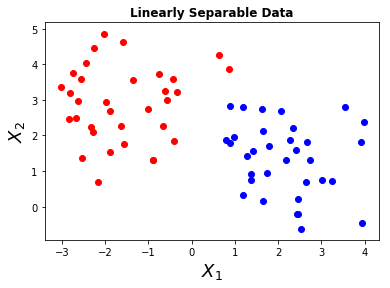

In [95]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, random_state=0, shuffle=False)
y = y[34:]
X = X[34:, :]

plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue')
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c='red')
plt.xlabel(r'$X_1$', fontsize=18)
plt.ylabel(r'$X_2$', fontsize=18)
plt.title('Linearly Separable Data', weight='bold')
plt.show()

Funtion to plot decision boundries

In [ ]:
def plot_decision_boundries(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    
    # prediction space
    y_pred = clf.predict(X).reshape(x1.shape)
    # prediction confidence scores
    y_decision = clf.decision_function(X).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, cmap=blue_red_cmap, alpha=0.2)
    plt.contourf(x1, x2, y_decision, cmap=plt.cm.brg, alpha=0.1)

Train the models and plot them

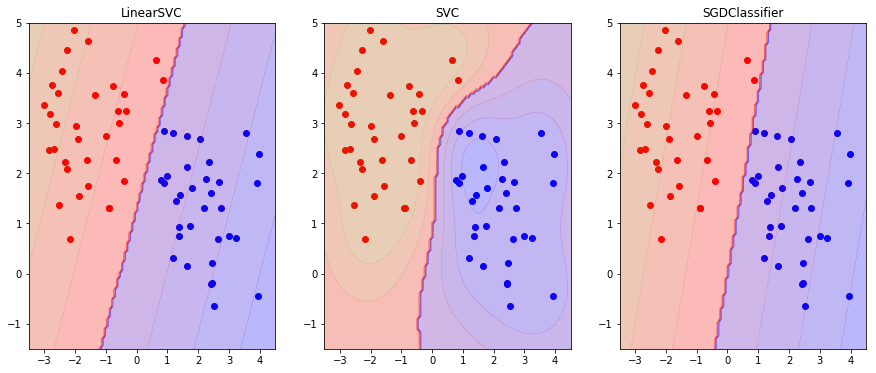

In [105]:
lin_svm_clf = LinearSVC().fit(X, y)
svm_clf = SVC(gamma='auto').fit(X, y)
sgd_clf = SGDClassifier(tol=10)
sgd_clf.fit(X, y)

axes = [-3.5, 4.5, -1.5, 5]
models = [lin_svm_clf, svm_clf, sgd_clf]

plt.figure(figsize=(15, 6))
for model, pos in zip(models, range(1,4)):
    plt.subplot(1, 3, pos)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue')
    plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c='red')
    plt.title('{}'.format(model.__class__.__name__))
    plt.axis(axes)
    plot_decision_boundries(model, axes=axes)
    
plt.show()

# Nonlinear SVM Classificaton

* have an example on a dataset that is not linearly separable

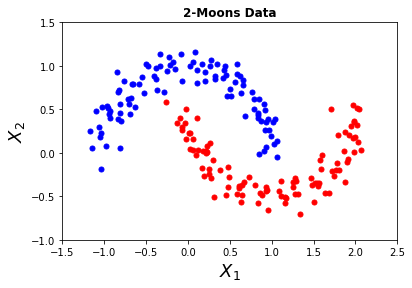

In [92]:
# import data
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=0)

# create function to plot the two-moon dataset
def plot_moons(X, y, axes):
    #plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='blue', marker='.', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='.', s=100)
    plt.axis(axes)
    plt.xlabel(r'$X_1$', fontsize=18)
    plt.ylabel(r'$X_2$', fontsize=18)
    plt.title('2-Moons Data', weight='bold')
    
plot_moons(X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

* we need to add polynomial features
* and train the model

In [93]:
poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(C=10, loss='hinge', random_state=0, max_iter=10000))
])

poly_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0))])

**Plot the data and model decision boundries**

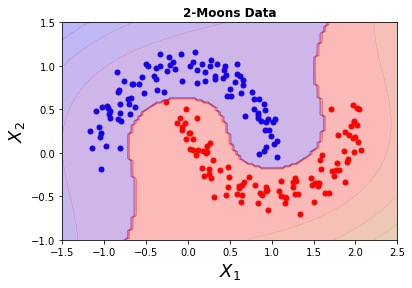

In [94]:
# colormap for areas
blue_red_cmap = ListedColormap(['#0000ff', '#ff0000'])

def plot_decision_boundries(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    
    # prediction space
    y_pred = clf.predict(X).reshape(x1.shape)
    # prediction confidence scores
    y_decision = clf.decision_function(X).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, cmap=blue_red_cmap, alpha=0.2)
    plt.contourf(x1, x2, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_moons(X, y, axes=[-1.5, 2.5, -1, 1.5])
plot_decision_boundries(poly_svm_clf, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

## Kernel Trick

* Using `PolynomialFeatures` transformer is neat but can quickly slow down the model due to high number of added features
* When using *SVM*-s one can add polynomial features on the go with some mathematical trickery
* Let's test it on **SVC()** class

In [88]:
# test Kernel Trick on two moons data
# coef0 parameter controls how much the model is
# influenced by high degree polynomials vs low-degree
poly3_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=3, coef0=1))
]).fit(X, y)

poly10_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=5, kernel='poly', degree=10, coef0=100))
]).fit(X, y)

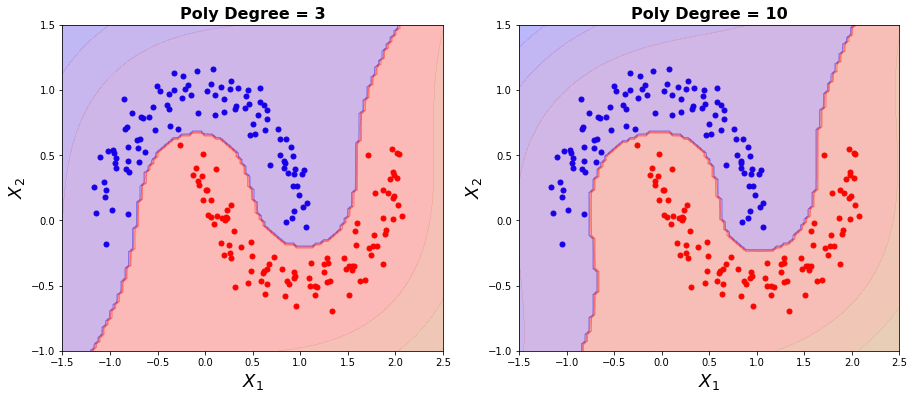

In [89]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_moons(X, y, [-1.5, 2.5, -1, 1.5])
plot_decision_boundries(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title('Poly Degree = 3', fontsize=16, weight='bold')

plt.subplot(1, 2, 2)
plot_moons(X, y, [-1.5, 2.5, -1, 1.5])
plot_decision_boundries(poly10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title('Poly Degree = 10', fontsize=16, weight='bold')
plt.show()

## Summary

 * *LinearSVC* is faster than *SVC(kernel='linear')*
 * The main parameter of linear models is the **regularization parameter**, called **alpha** in the regression models and **C** in LinearSVC and LogisticRegression.
 * Large values for alpha or small values for C mean simple models.
 * Usually C and alpha are searched for on a logarithmic scale.
 * Decision to use L1 regularization or L2 regularization.
 * If you assume that only a few of your features are actually important, you should use L1 (Lasso).
 * Otherwise, you should default to L2 (Ridge)).
 * Linear models are very fast to train, and also fast to predict. 
 * They scale to very large datasets and work well with sparse data.
 * If your data consists of millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge , which can be faster than the default on large datasets.
 * Linear models often perform well when the number of features is large compared to the number of samples.
 * in lower-dimensional spaces, other models might yield better generalization performance.

# Naive Bayes Classifiers

 * are quite similar to the linear models just discussed, but they tend to be even faster in training.
 * The price is paid off generalization performance, which is slightly worse than for LogisticRegression and LinearSVC.
 * naive Bayes efficiency comes while they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.
 * Three different classifiers in scikit-learn:
     + **GaussianNB** : any continuous data
     + **BernoulliNB** : only binary data
     + **MultinomialNB** : count data
 * BernoulliNB and MultinomialNB are mostly used in text classification. 
 * **BernoulliNB** classifier counts how often every feature of each class is not zero.

In [130]:
# example
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 
              1, 
              0, 
              1])

# Counting the nonzero entries per class in essence looks like this:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


* **MultinomialNB** takes into account the average value of each feature for each class.
 * **GaussianNB** stores the average value as well as the standard deviation of each feature for each class.
 * To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted. 
 * Interestingly, for both MultinomialNB and BernoulliNB, this leads to a prediction formula that is of the same form as in the linear models.
 * Unfortunately, coef_ for the naive Bayes models has a somewhat different meaning than in the linear models, in that coef_ is not the same as w.

## Summary

 * MultinomialNB and BernoulliNB have a single parameter, alpha , which controls model complexity.
 * The algorithm’s performance is relatively robust to the setting of alpha , meaning that setting alpha is not critical for good performance.
 * GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text.
 * Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.